In [81]:
#LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
%matplotlib inline

In [82]:
iris_dataset = pd.read_csv("iris.csv")
iris_dataset.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [83]:
iris_dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
X = iris_dataset.iloc[:, 0:3].values
niris_dataset = iris_dataset.drop(['variety'], axis=1)
y = iris_dataset.iloc[:, 4].values

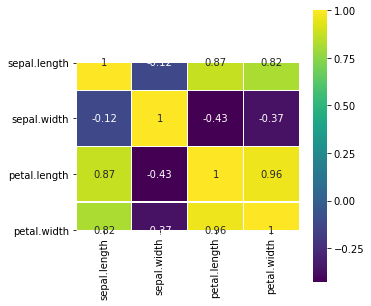

In [85]:
colormap = plt.cm.viridis
plt.figure(figsize=(5,5))
plt.title('', y=1.05, size=10)
sns.heatmap(niris_dataset.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [86]:
niris_dataset.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [87]:
new_iris_dataset = niris_dataset.drop(['sepal.width'], axis=1)
new_iris_dataset.head(5)

,sepal.length,petal.length,petal.width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


50
50
50


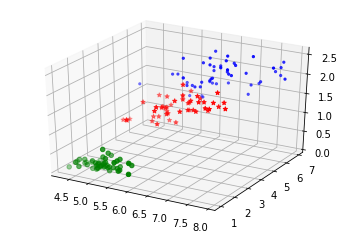

In [88]:
sepalen_setosa = []
petalen_setosa = []
petalwi_setosa = []

sepalen_versicolor = []
petalen_versicolor = []
petalwi_versicolor = []

sepalen_virginica = []
petalen_virginica = []
petalwi_virginica = []

for i in range(len(iris_dataset)):
    if iris_dataset['variety'][i] == 'Setosa':
        sepalen_setosa.append(iris_dataset["sepal.length"][i])
        petalen_setosa.append(iris_dataset["petal.length"][i])
        petalwi_setosa.append(iris_dataset["petal.width"][i])
        
    else:
        if iris_dataset['variety'][i] == 'Versicolor':
            sepalen_versicolor.append(iris_dataset["sepal.length"][i])
            petalen_versicolor.append(iris_dataset["petal.length"][i])
            petalwi_versicolor.append(iris_dataset["petal.width"][i])
        else:
            sepalen_virginica.append(iris_dataset["sepal.length"][i])
            petalen_virginica.append(iris_dataset["petal.length"][i])
            petalwi_virginica.append(iris_dataset["petal.width"][i])

print(len(sepalen_setosa))
print(len(sepalen_versicolor))
print(len(sepalen_virginica))

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')


# Agregamos los puntos en el plano 3D
ax1.scatter(sepalen_setosa, petalen_setosa,petalwi_setosa, c='g', marker='o')
ax1.scatter(sepalen_versicolor, petalen_versicolor, petalwi_versicolor, c='r', marker='*')
ax1.scatter(sepalen_virginica, petalen_virginica, petalwi_virginica, c='b', marker='.')

# Mostramos el gráfico
plt.show()
            

In [89]:
X = new_iris_dataset.iloc[:, 0:3].values
y = iris_dataset.iloc[:, 4].values
new_iris_dataset['variety'] = y
new_iris_dataset.head(5)

,sepal.length,petal.length,petal.width,variety
0,5.1,1.4,0.2,Setosa
1,4.9,1.4,0.2,Setosa
2,4.7,1.3,0.2,Setosa
3,4.6,1.5,0.2,Setosa
4,5.0,1.4,0.2,Setosa


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [91]:
print(y_train.shape)
print(y_test.shape)

print(X_train.shape)
print(X_test.shape)

(105,)
(45,)
(105, 3)
(45, 3)


In [92]:

k_range = range(1,10)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [93]:
scores

{1: 0.9333333333333333,
 2: 0.8666666666666667,
 3: 0.9333333333333333,
 4: 0.9333333333333333,
 5: 0.9777777777777777,
 6: 0.9777777777777777,
 7: 0.9777777777777777,
 8: 0.9777777777777777,
 9: 0.9777777777777777}

In [94]:
prediccion = KNeighborsClassifier(n_neighbors=3)
prediccion.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [95]:
print(prediccion.predict([[5, 5, 1.5]]))

['Versicolor']
